## Imports

In [1]:
##Biblioteca para ambos ejercicios
import random
import matplotlib.pyplot as plt
import os
import sys
from tabulate import tabulate
from IPython.display import clear_output    

# Ejercicio #1

## Declare

In [2]:
##Constantes
registros=100  #Numero de registros
iteraciones= 10000 #Numero total iteraciones,lanzamientos de dado

#Variables
lista = []    #Definicion de la lista
i=0  #variable para recorrer loops
index=0  #indice de la lista
all_indexes=[] #lista de indices

In [3]:
#Inicializar valores en 0
for x in range(registros):
    lista.append(0)

In [4]:
while i<=iteraciones:
    index=random.randint(0, 99)
    lista[index]=lista[index]+1
    i=i+1


## Visualizacion

In [5]:
print(lista)

[125, 106, 93, 98, 111, 92, 111, 83, 101, 100, 76, 82, 110, 110, 112, 100, 98, 100, 101, 112, 92, 109, 83, 105, 101, 112, 85, 91, 101, 97, 109, 99, 91, 86, 115, 95, 103, 108, 100, 92, 95, 84, 96, 99, 101, 104, 91, 94, 113, 93, 92, 91, 91, 106, 92, 99, 97, 94, 98, 113, 124, 95, 107, 98, 99, 111, 94, 90, 113, 101, 101, 108, 103, 98, 97, 87, 111, 96, 114, 108, 117, 90, 107, 99, 99, 96, 93, 102, 103, 106, 106, 101, 107, 97, 99, 95, 95, 117, 88, 91]


In [6]:
#Obtener lista de indices para eje x
all_indexes = [a for a in range(len(lista))]

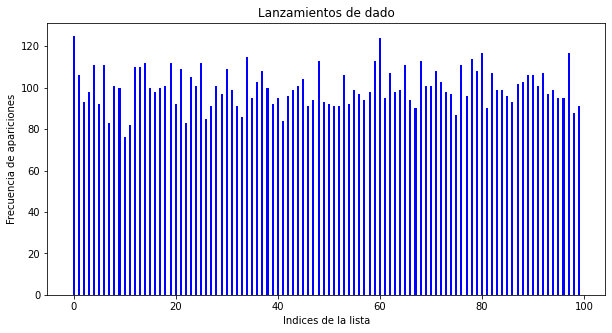

In [7]:
indices = list(all_indexes)
valores = list(lista)
  
fig = plt.figure(figsize = (10, 5))
 
# Creando el grafico
plt.bar(indices, valores, color ='blue',
        width = 0.4)
 
plt.xlabel("Indices de la lista")
plt.ylabel("Frecuencia de apariciones")
plt.title("Lanzamientos de dado")
plt.show()

# Ejercicio #2

2. Gestión de una lista de compras

Crea un programa que se llama GestionCompras( ) para gestionar una lista de compras. El programa debe permitir al usuario:

(1)Agregar elementos a la lista de compras.

(2)Mostrar la lista de compras completa.

(3)Eliminar elementos de la lista de compras.

(4)Verificar si un artículo específico está en la lista de compras.

(5)Calcular el total de la compra sumando los precios de los artículos.

(6)Salir del programa de compras (es decir terminar la ejecución del programa)

En cada iteración, el programa debe mostrar el menú anterior. El programa debe preguntar al usuario qué acción desea ejecutar. El usuario indicará qué acción quiere ejecutar mediante el número asociado. Por ejemplo, si ingresa un 1, quiere decir que la acción a ejecutar es la de Agregar elementos a la lista.

Para cada acción, se debe preparar el código y funcionalidad asociada. 

El programa deberá repetirse hasta el que usuario ingrese un 6, es decir, la opción de salir y terminar el programa.

## Declare

In [8]:
#Variables
global articulos      
global carrito       
global factura    
global codigo      
global producto       
global precio        
global unidades
global subtotal       
global total         
global codigo_busqueda
global index           

In [9]:
##Inicializacion de variables
articulos=[]       #Lista de articulos
carrito=[]         #Carrito de compras
factura=[]         #Factura
codigo=""          #Codigo del producto
producto=""
precio=0.0         #nombre del producto
unidades=0
subtotal=0         #Precio por linea de producto
total=0            #total de la factura
codigo_busqueda="" #Codigo producto a buscar
index=0            #indice de la lista 

##Inicializacion de lista,insercion de algunos articulos.No se requiere en el ejercicio pero es para facilitar el debug del mismo
#Se definen campos como codigo,producto,precio,unidades
articulos.append(['A001','Collares Perro',12,100])
articulos.append(['A002','Comida para perro',25,150])
articulos.append(['A003','Comida para gato',18,35])
articulos.append(['A004','Vacuna pulgas',3.5,25])
articulos.append(['A005','Gasas',0.5,100])

## Codigo

### Modulo Menu

In [10]:
def menu():
    try:
        opcion=True
        while opcion:
            print ("""
            1.Agregar articulos
            2.Imprimir listado articulos
            3.Eliminar articulo
            4.Buscar articulo
            5.Total Compras
            6.Salir
            """)
            opcion=int(input("Seleccione una opcion del menu "))
            
            if opcion==1: 
                print("\n Modulo Agregar articulos") 
                
                #####Input de variables####
                try:
                    codigo=input("Digite el codigo del producto-formato ejemplo A00x: ")
                    producto=input("Digite el nombre del producto: ")
                    precio=float(input("Digite el precio del producto: "))
                    unidades=int(input("Digite el numero de unidades disponibles: "))
                except ValueError as val:
                    print(f"Revise el ingreso de datos {val}")
                    menu()
                #####Input de variables####
                
               #llamado de la funcion
                out=fn_agregar(articulos,codigo,producto,precio,unidades)
                
                if out==True:
                    print("\n Producto agregado exitosamente")
                else:
                    print("Error durante el proceso")
                opcion=False
                menu()
                
            elif opcion==2:
                print("\n Listado de articulos disponibles")
                
                #llamado de la funcion
                out=(fn_imprimir(articulos))
                
                if out==False:
                    print("Error")
                opcion=False
                menu()
            elif opcion==3:
                print("\n Eliminar articulo") 
                
                #####Obtener indice del codigo a eliminar####
                try:
                    codigo_busqueda=str(input("\n Digite el codigo del producto que desea eliminar: "))
                    busqueda = next((i for i, (codigo,producto,precio,unidades) in enumerate(articulos) if codigo == codigo_busqueda), None)
                except ValueError as val:
                    print(f"Revise el ingreso de datos {val}")
                    menu()
                #############################################
                
                #llamado de la funcion
                out=fn_eliminar(articulos,busqueda)
                
                print(out)
                opcion=False
                menu()
            elif opcion==4:
                print("\n Buscar articulo") 
                
                #####Obtener codigo busqueda####
                try:
                    codigo_busqueda=str(input("Digite el codigo del producto que desea buscar: "))
                    busqueda = next((i for i, (codigo,producto,precio,unidades) in enumerate(articulos) if codigo == codigo_busqueda), None)
                except ValueError as val:
                    print(f"Revise el ingreso de datos {val}")
                    menu()
                #############################################
                
                #llamado de la funcion
                out=fn_buscar(articulos,busqueda)
                
                print(out)
                opcion=False
                menu()
            elif opcion==5:
                print("\n Total Compras") 
                
                #llamado de la funcion
                out=fn_facturar()
                
                print(tabulate(factura, headers=["Codigo", "Producto", "Precio","Unidades","Precio"]))
                
                opcion=False
                menu()
            elif opcion==6:
                print("\n Salir") 
                opcion=False
            elif opcion not in [1,2,3,4,5,6]:
                print("\n Seleccione una opcion valida entre 1 y 6") 
    except Exception as err:
        print(f"Unexpected {err}, {type(err)}")
        raise
    return True

### Modulo 1 Agregar articulo

In [11]:
def fn_agregar(lista,codigo,producto,precio,unidades):
    try:
        lista.append([codigo,producto,precio,unidades])
    except Exception as err:
        print(f"Unexpected {err}, {type(err)}")
        raise
    return True

### Modulo 2 Imprimir lista

In [12]:
def fn_imprimir(lista):
    try:
        print(tabulate(lista, headers=["Codigo", "Producto", "Precio","Unidades"]))
        return True
    except Exception as err:
        print(f"Unexpected {err}, {type(err)}")
        raise
        return False
    
     

### Modulo 3 eliminar articulo

In [13]:
def fn_eliminar(lista,indice):
    try:
        if indice==None:
            result="Codigo no existe"
        else:
            lista.pop(indice)
            result=f"Producto {indice} fue eliminado exitosamente"
        return result
    except Exception as err:
        print(f"Unexpected {err}, {type(err)}")
        return False
  
        
    
 


### Modulo 4 buscar articulo

In [14]:
#Para facturacion se incluye la posibilidad de que el usuario almecene productos en el carrito para su posterior facturacion
def fn_buscar(lista,indice):
    result=""
    try:
        if indice==None:
            result="Codigo no existe"
        else:
            print(lista[indice])
            opt=input("Desea agregar producto al carrito S/N: ")
            opt=opt.upper()
            if opt=="S":
                cantidad=int(input("Cuantos productos desea comprar"))
                carrito.append([lista[indice][0],lista[indice][1],lista[indice][2],cantidad])
                result="Producto agregado al carrito"
            else:
                result="Se cancela inclusion carrito"
        return result
    except Exception as err:
        print(f"Unexpected {err}, {type(err)}")
        return False

### Modulo 5 Totalizar compras

In [15]:
def fn_facturar():
    total=0
    try:
        #Calculando importe por linea de productos
        for codigo,producto,precio,unidades in carrito:
            subtotal=precio*unidades
            factura.append([codigo,producto,precio,unidades,subtotal])
        #Totalizando por linea y guardando total
        for codigo,producto,precio,unidades,subtotal in factura:
            total=total+subtotal
        factura.append(["","","","Total",total])
        return True
    except Exception as err:
        print(f"Unexpected {err}, {type(err)}")
        return False

### Modulo Principal

In [16]:
def GestionCompras():
    #clear_output(wait=)
    menu()
    return True

In [17]:
if __name__ == "__main__":
    GestionCompras()


            1.Agregar articulos
            2.Imprimir listado articulos
            3.Eliminar articulo
            4.Buscar articulo
            5.Total Compras
            6.Salir
            
Seleccione una opcion del menu 1

 Modulo Agregar articulos
Digite el codigo del producto-formato ejemplo A00x: A006
Digite el nombre del producto: Shampoo
Digite el precio del producto: 5.2
Digite el numero de unidades disponibles: 5

 Producto agregado exitosamente

            1.Agregar articulos
            2.Imprimir listado articulos
            3.Eliminar articulo
            4.Buscar articulo
            5.Total Compras
            6.Salir
            
Seleccione una opcion del menu 2

 Listado de articulos disponibles
Codigo    Producto             Precio    Unidades
--------  -----------------  --------  ----------
A001      Collares Perro         12           100
A002      Comida para perro      25           150
A003      Comida para gato       18            35
A004      Vacuna pul